In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import integrate

In [3]:
"""
    Function to implements Euler-Maruyama method to simulate SDEs
    
    Input: 
        mu    -> mean returns
        sigma -> volatility
        S0    -> Stock price today
        h     -> time discretization step size
        N     -> Number of time points
        dW    -> Increment of brownian motion at each time step
    Output:
        S     -> Stock price dynamics for the given realisation of Brownian Motion
"""
def euler_maruyama(mu, sigma, S0, h, N, dW):
    

    S = np.zeros(N+1)
    S[0] = S0
    
    for i in range(1, N+1):
        S[i] = S[i-1] + mu*S[i-1]*h + sigma*S[i-1]*dW[i-1]
    return S

In [4]:
 """
    Function to implements Euler-Maruyama method to simulate SDEs
    
    Input: 
        mu    -> mean returns
        sigma -> volatility
        S0    -> Stock price today
        h     -> time discretization step size
        N     -> Number of time points
        dW    -> Increment of brownian motion at each time step
    Output:
        S     -> Stock price dynamics for the given realisation of Brownian Motion
    """
def milstein(mu, sigma, S0, h, N, dW):
    
    S = np.zeros(N+1)
    S[0] = S0
    
    for i in range(1, N+1):
        S[i] = S[i-1] + mu*h*S[i-1] + sigma*S[i-1]*dW[i-1] + 0.5*sigma**2*S[i-1]*(dW[i-1]**2 - h)
    return S

In [5]:
 """
    Function to implements Euler-Maruyama method to simulate SDEs
    
    Input: 
        mu    -> mean returns
        sigma -> volatility
        S0    -> Stock price today
        h     -> time discretization step size
        N     -> Number of time points
        dW    -> Increment of brownian motion at each time step
    Output:
        S     -> Stock price dynamics for the given realisation of Brownian Motion
    """
def runge_kutta(mu, sigma, S0, h, N, dW):
    
    S = np.zeros(N+1)
    S[0] = S0
    
    for i in range(1, N+1):
        S[i] = S[i-1] + mu*h*S[i-1] + sigma*S[i-1]*dW[i-1] + 0.5*(sigma*(S[i-1]+ mu*h*S[i-1] + sigma*S[i-1]*(h**0.5)) - sigma*S[i-1]) * (dW[i-1]**2 - h)*h**(-0.5)
    return S

In [6]:
# Input parameters
mu = 0.06
sigma = 0.3
S0 = 50
t0 = 0
T = 1

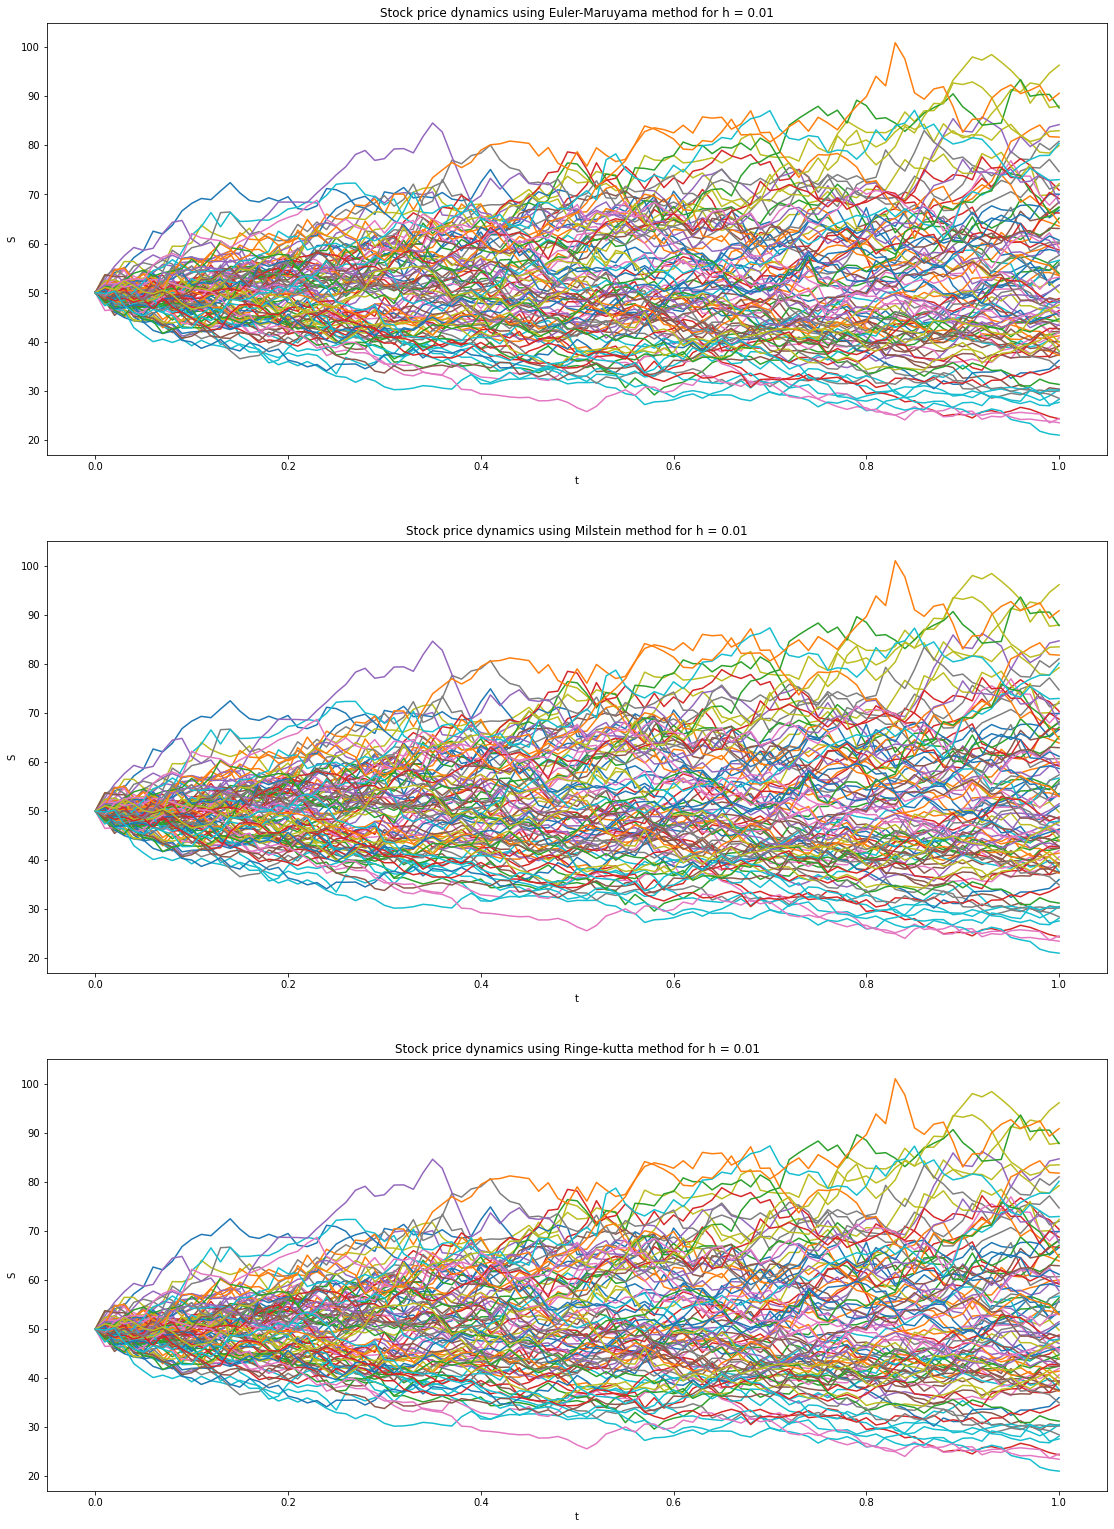

In [7]:
M = 100
h = 10**(-2)

N = int(1 / h) # number of time points

# prepare plot
fig1 = plt.figure(figsize=(19, 27))
ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)
x = np.linspace(0, 1, N + 1)


for j in range(0, M):
  
  # create random BM
  dW = np.zeros(N)
  for i in range(0, N):
    dW[i] = np.sqrt(h) * np.random.normal(loc=0.0, scale=1.0)
  
  # Euler Maruyama
  S_EM = euler_maruyama(mu, sigma, S0, h, N, dW)
  ax1.plot(x, S_EM)
  ax1.title.set_text("Stock price dynamics using Euler-Maruyama method for h = 0.01")
  ax1.set_xlabel('t')
  ax1.set_ylabel('S')

  # Milstein
  S_M = milstein(mu, sigma, S0, h, N, dW)
  ax2.plot(x, S_M)
  ax2.title.set_text("Stock price dynamics using Milstein method for h = 0.01")
  ax2.set_xlabel('t')
  ax2.set_ylabel('S')


  # Runge kutta
  S_RK = runge_kutta(mu, sigma, S0, h, N, dW)
  ax3.plot(x, S_RK)
  ax3.title.set_text("Stock price dynamics using Ringe-kutta method for h = 0.01")
  ax3.set_xlabel('t')
  ax3.set_ylabel('S')



 


plt.show()

In [8]:
"""
    Function to implements GBM solution
    
    Input: 
        mu    -> mean returns
        sigma -> volatility
        S0    -> Stock price today
        h     -> time discretization step size
        N     -> Number of time points
        dW    -> Increment of brownian motion at each time step
    Output:
        S     -> Stock price dynamics for the given realisation of Brownian Motion
"""
def GBM(mu, sigma, S0, h, N, dW):
    
    S = np.zeros(N+1)
    S[0] = S0
    
    for i in range(1, N+1):
        S[i] = S[i-1] * np.exp((mu-sigma**2/2)*h + sigma*dW[i-1])
    return S

 h       err_EM      err_M      err_RK
---------------------------------
 0.1000  8.1804e-01  7.2814e-02  9.2939e-02
 0.0100  2.2203e-01  9.2512e-03  1.0961e-02
 0.0010  7.6000e-02  9.7424e-04  1.1001e-03
 0.0001  2.8655e-02  8.2024e-05  1.0470e-04



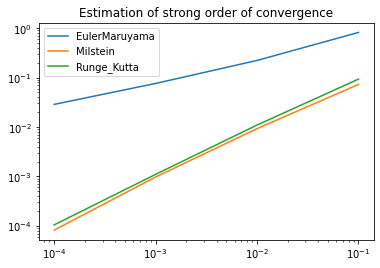

Strong convergence order of Euler Maruyama is c = 0.4832
Strong convergence order of Milstein is c = 0.9822
Strong convergence order of Runge kutta is c = 0.9843


In [9]:
h = [10**(-1), 10**(-2), 10**(-3), 10**(-4)]
M = 100

# output for the table
print(' h       err_EM      err_M      err_RK')
print('---------------------------------')
# output for the plot
eps_EM = np.zeros(len(h))
eps_M = np.zeros(len(h))
eps_RK = np.zeros(len(h))

# calculate the error for every step size h=[0.1,0.01,0.001,0.0001]
for i in range(0, len(h)):
    N = int(1 / h[i]) # number of time points
    sum_EM = 0
    sum_M = 0
    sum_RK = 0

  # calculate the term sum(abs(S_{T,k} - S_{T,k}^{^}))
    for j in range(0, M):
    # create random BM
        dW = np.zeros(N)
        for q in range(0, N):
            dW[q] = np.sqrt(h[i])*np.random.normal(loc=0.0, scale=1.0)
        S_EM = euler_maruyama(mu, sigma, S0, h[i], N, dW)
        S_M = milstein(mu, sigma, S0, h[i], N, dW)
        S_RK = runge_kutta(mu, sigma, S0, h[i], N, dW)
        S_GBM = GBM(mu, sigma, S0, h[i], N, dW) # exact solution
        sum_EM = sum_EM + abs(S_GBM[N] - S_EM[N]) # only last elements
        sum_M = sum_M + abs(S_GBM[N] - S_M[N])
        sum_RK = sum_RK + abs(S_GBM[N] - S_RK[N])

  # calculate eps(h)
    err_EM = 1/M * sum_EM 
    err_M = 1/M * sum_M
    err_RK = 1/M * sum_RK
    print(' %4.4f %11.4e %11.4e %11.4e'  %(h[i], err_EM, err_M, err_RK))
    eps_EM[i] = err_EM
    eps_M[i] = err_M
    eps_RK[i] = err_RK

print()

# estimate strong convergence, take the log
plt.loglog(h,eps_EM, label = 'EulerMaruyama')
plt.loglog(h,eps_M, label = 'Milstein')
plt.loglog(h,eps_RK, label = 'Runge_Kutta')
plt.title(r'Estimation of strong order of convergence')
plt.legend()
plt.show()

# estimate the order (slope) with linear congression
x = abs(np.log10(h).reshape((-1, 1)))
y1 = abs(np.log10(abs(eps_EM)))
y2 = abs(np.log10(abs(eps_M)))
y3 = abs(np.log10(abs(eps_RK)))
e_m = LinearRegression().fit(x, y1) 
m = LinearRegression().fit(x, y2) 
r_k = LinearRegression().fit(x, y3)
print('Strong convergence order of Euler Maruyama is c = %.4f' %(abs(e_m.coef_)))
print('Strong convergence order of Milstein is c = %.4f' %(abs(m.coef_)))
print('Strong convergence order of Runge kutta is c = %.4f' %(abs(r_k.coef_)))

In [10]:
  """
    Function to implements Black Scholes formula for European Call option
    
    Input: 
        S0    -> Stock price today
        K     -> Strike price
        r     -> Interest rate
        T     -> Maturity
        sigma -> volatility
    Output:
        C     -> Fair value of European Call price
    """
def BlackScholes(S0, K, r, T, sigma):
   
    d1 = ( log(S0/K) + (r+sigma*sigma/2.0)*T ) / ( sigma*sqrt(T) )
    d2 = d1 - sigma*sqrt(T)
    # BC-Formula for European Call option
    C = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    return C

In [11]:
K = 90
r = 0.05
M = [1000, 10000, 100000]

h = 10**(-4)
N = int(1/h)



C_BS = BlackScholes(S0, K, r, T, sigma)

C_EM = np.zeros(len(M))
err_EM = np.zeros(len(M))

C_M = np.zeros(len(M))
err_M = np.zeros(len(M))

C_RK = np.zeros(len(M))
err_RK = np.zeros(len(M))

A_C_EM = np.zeros(len(M))
A_C_M = np.zeros(len(M))
A_C_RK = np.zeros(len(M))

# create M=10,100,1000 paths and calculate the sum of the payoff
for i in range(0, len(M)):
    m = M[i]
    sum_EM = 0.0
    sum_M = 0.0
    sum_RK = 0.0
    sum_A_EM = 0.0
    sum_A_M = 0.0
    sum_A_RK = 0.0

    for w in range(0, m):
    # create random BM
        dW = np.zeros(N)
        for p in range(0, N):
            dW[p] = np.sqrt(h)*np.random.normal(loc=0.0, scale=1.0)

        S_EM = euler_maruyama(r, sigma, S0, h, N, dW)
        S_M = milstein(r, sigma, S0, h, N, dW)
        S_RK = runge_kutta(r, sigma, S0, h, N, dW)
        
        payoff_EM = max(S_EM[N] - K, 0)
        payoff_M = max(S_M[N] - K, 0)
        payoff_RK = max(S_RK[N] - K, 0)
        
        sum_EM = sum_EM + payoff_EM
        sum_M = sum_M + payoff_M
        sum_RK = sum_RK + payoff_RK

    # Asian option
        x = np.linspace(0,1,N+1)
        payoff_A_EM = max(integrate.simps(S_EM, x) - K, 0)
        payoff_A_M = max(integrate.simps(S_M, x) - K, 0)
        payoff_A_RK = max(integrate.simps(S_RK, x) - K, 0)
        
        sum_A_EM = sum_A_EM + payoff_A_EM
        sum_A_M = sum_A_M + payoff_A_M
        sum_A_RK = sum_A_RK + payoff_A_RK

    C_EM[i] = np.exp(-r) * sum_EM / m # calculate the average
    C_M[i] = np.exp(-r) * sum_M / m
    C_RK[i] = np.exp(-r) * sum_RK / m
    
    A_C_EM[i] = np.exp(-r) * sum_A_EM / m
    A_C_M[i] = np.exp(-r) * sum_A_M / m
    A_C_RK[i] = np.exp(-r) * sum_A_RK / m

    err_EM[i] = abs(C_BS - C_EM[i])
    err_M[i] = abs(C_BS - C_M[i])
    err_RK[i] = abs(C_BS - C_RK[i])
    

In [12]:
print('M = ', M )
print('C_BS = ', C_BS)
print('C_EM =', C_EM)
print('ERR_EM =',err_EM)
print('C_M =', C_M)
print('ERR_M =', err_EM)
print('C_RK =', C_RK)
print('ERR_RK =', err_RK)
print('A_C_EM =', A_C_EM)
print('A_C_M =', A_C_M)
print('A_C_RK =', A_C_RK)

M =  [1000, 10000, 100000]
C_BS =  0.2830049269755599
C_EM = [0.36505286 0.26644125 0.26626017]
ERR_EM = [0.08204793 0.01656368 0.01674475]
C_M = [0.36511055 0.26648218 0.26628405]
ERR_M = [0.08204793 0.01656368 0.01674475]
C_RK = [0.36511064 0.26648225 0.2662841 ]
ERR_RK = [0.08210571 0.01652268 0.01672083]
A_C_EM = [0.         0.00222046 0.00259611]
A_C_M = [0.         0.00221558 0.00260169]
A_C_RK = [0.         0.00221557 0.0026017 ]


In [16]:
rho = [-0.9, 0, 0.9]
mu1 = mu2 = 0
S01 = 100
S02 = 105
T = 1
sigma1 = 0.2
sigma2 = 0.3
h = 10**(-4)
N = int(1/h)
r = 0

S_M1 = {}
S_M2 = {}

for i in range(len(rho)):
  dW1 = np.zeros(N)
  for p in range(0, N):
    dW1[p] = np.sqrt(h)*np.random.normal(loc=0.0, scale=1.0)
    
  dW3 = np.zeros(N)
  for p in range(0, N):
    dW3[p] = np.sqrt(h)*np.random.normal(loc=0.0, scale=1.0)     

  dW2 = rho[i]*dW1 + np.sqrt(1-(rho[i]**2))*dW3
  S_M1[i] = milstein(mu1, sigma1, S01, h, N, dW1)
  S_M2[i] = milstein(mu2, sigma2, S02, h, N, dW2)

  payoff1 = np.exp(-r*T)*max(S_M1[i][-1], S_M2[i][-1], 0)
  print("Max call Option for rho = %4.1f is  %4.2f " %(rho[i], payoff1)) 
  payoff2 = np.exp(-r*T)*max(min(S_M1[i][-1], S_M2[i][-1]), 0)
  print("Min call option for rho = %4.1f is %4.2f " %(rho[i], payoff2))

Max call Option for rho = -0.9 is  143.50 
Min call option for rho = -0.9 is 75.60 
Max call Option for rho =  0.0 is  116.00 
Min call option for rho =  0.0 is 91.76 
Max call Option for rho =  0.9 is  107.72 
Min call option for rho =  0.9 is 106.36 


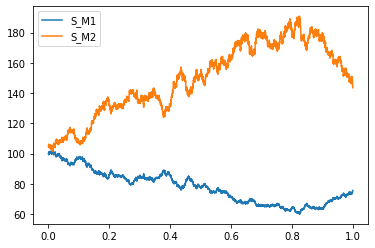

In [17]:
x = np.linspace(0, 1, N + 1)
plt.plot(x, S_M1[0], label = "S_M1")
plt.plot(x, S_M2[0], label = "S_M2")
plt.legend()

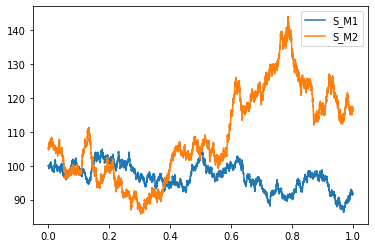

In [18]:
plt.plot(x, S_M1[1], label = "S_M1")
plt.plot(x, S_M2[1], label = "S_M2")
plt.legend()

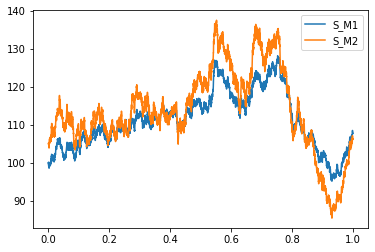

In [19]:
plt.plot(x, S_M1[2], label = "S_M1")
plt.plot(x, S_M2[2], label = "S_M2")
plt.legend()

# Heston model

In [17]:
"""
Function to implements Heston stochatic volatility model    
    Input: 
        S0    -> Stock price today
        theta -> the mean level (long term)
        N     -> Number of time points
        sigma -> volume of volume
        K     -> kappa
        rho   -> correlance
    Output:
        S     -> Stock price dynamics for the given realisation of Brownian Motion 
        V     -> fair price of an option at t
"""

def heston_Model(S0, v0, rho, kappa, theta, sigma, T, N, M, h):
 
  W = np.random.normal(0, (h**(1/2)), (2, N))
  dW1 = W[0]
  Zt = W[1]
  dW2 = rho*dW1 + np.sqrt(1 - (rho**2))*Zt

  S = np.zeros(N+1)
  S[0] = S0
  v = np.zeros(N+1)
  v[0] = v0
  r = np.zeros(N+1)

  for i in range(1, N+1):
    r[i-1] = 0.01*(np.sin(2*np.pi*h) + h + 3)
    S[i] = S[i-1] * np.exp((r[i-1] - 0.5*v[i-1])*h + np.sqrt(v[i-1]) * dW1[i-1])
    v[i] = max((v[i-1] + kappa*(theta - v[i-1])*h + sigma*np.sqrt(v[i-1]) *dW2[i-1]), 0)      #value of v sould be positive, may be also take np.abs
    
  return S, v

In [24]:
import scipy as scp
import scipy.stats as ss

[2.         2.00549503 2.00697898 ... 2.20010561 2.19849058 2.19618677]


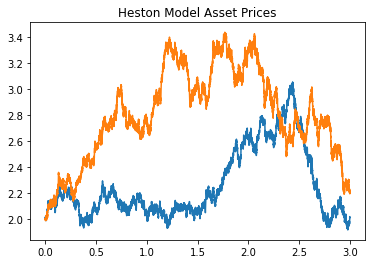

In [41]:
# Heston dependent parameters
k = 2
v0 = theta = 0.04
sigma = 0.1
rho = -0.7

K = S0 = 2
T = 3
h = 10**(-4)
N = int(T/h)
M = 2             #number of path

for j in range(0, M):
  S, v = heston_Model(S0, v0, rho, k, theta, sigma, T, N, M, h)
  

  x = np.linspace(0, T, N + 1)
  plt.plot(x, S)


print(S) 
plt.title('Heston Model Asset Prices')
plt.show()


In [39]:
#European call value in heston model
DiscountedPayoff = np.exp(-r*T) * np.maximum(S-K,0)
V = scp.mean( DiscountedPayoff )
std_err = ss.sem( DiscountedPayoff )

print("Heston Monte Carlo call price: ", V)
print("With standard error: ", std_err)

Heston Monte Carlo call price:  0.9001823535377265
With standard error:  0.002940819517848545


C:\Users\leela\AppData\Local\Temp\ipykernel_15540\3821776873.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  V = scp.mean( DiscountedPayoff )


In [1]:
import numpy as np

# define the parameters of the model
T = 3
k = 2
v0 = 0.04
theta = 0.04
sigma = 0.1
rho = -0.7
K = 2
S0 = 2

# set the number of time steps and the number of simulations
N = 1000
M = 10000

# define the time grid and the time step
t = np.linspace(0, T, N+1)
dt = t[1] - t[0]

# generate the random samples of the correlated Brownian motions
dw1 = np.random.normal(size=(M, N))
dw2 = rho * dw1 + np.sqrt(1 - rho**2) * np.random.normal(size=(M, N))

# initialize the asset and volatility processes
St = np.ones((M, N+1)) * S0
vt = np.ones((M, N+1)) * v0

# simulate the asset and volatility processes using the Euler-Maruyama scheme
for i in range(N):
    rt = 1/100 * (np.sin(2 * np.pi * t[i]) + t[i] + 3)
    St[:, i+1] = St[:, i] * np.exp((rt - 0.5 * vt[:, i]) * dt + np.sqrt(vt[:, i] * dt) * dw1[:, i])
    vt[:, i+1] = np.maximum(vt[:, i] + k * (theta - vt[:, i]) * dt + sigma * np.sqrt(vt[:, i] * dt) * dw2[:, i], 0)

# calculate the discounted payoff of the European Call-option at maturity
payoff = np.maximum(St[:, -1] - K, 0) * np.exp(-rt * T)

# estimate the option price using the Monte-Carlo method
price = np.mean(payoff)

print(f"The price of the European Call-option in the Heston model is {price:.4f}")


The price of the European Call-option in the Heston model is 0.3928
